# Introduction to Python and FITS

*We will complete this notebook in the first computer lab on Friday, April 4. It does not need to be submitted to Canvas.*

**Goals:** Understand how to use Python to make plots of data and handle FITS files. Work with data in Google Drive using Google Colab.

**Authors:** Sebastian Wagner-Carena, Justin Myles, Modified by Anthony Flores and Brianna Cantrall

In [ ]:
print('Hello, world!')

Hello, world!


Many pre-existing tools can be imported.

In [ ]:
# numpy is a module with numerical tools
import numpy as np

# matplotlib is a module with plotting tools
import matplotlib
import matplotlib.pyplot as plt

# astropy is a module for working with astronomical data
import astropy.io.fits as fits

# pandas is a module for working with tabular data
import pandas as pd

# glob is a tool for Unix path name pattern matching
import glob

In [ ]:
# set some default values for matplotlib to use for plots
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.figsize'] = (8.,4.)

Description of ipython magic

In [ ]:
%matplotlib inline

The `matplotlib` module can be used to plot many things. The example below shows how to plot simple curves.

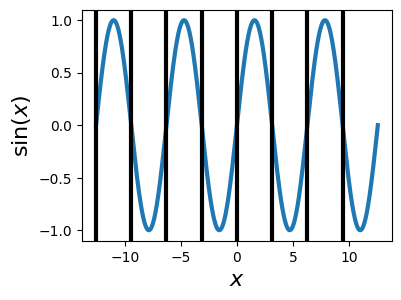

In [ ]:
# plot a sine curve
xvals = np.linspace(-4 * np.pi,4 * np.pi,1000)
yvals = np.sin(xvals)

plt.figure(figsize=(4.,3.))
plt.plot(xvals, yvals, label='sin(x)', lw=3)
for i in range(-4,4,1):
    plt.axvline(i * np.pi, color='k', lw=3)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$');

This module can also be used to plot discrete samples from a probability distribution.

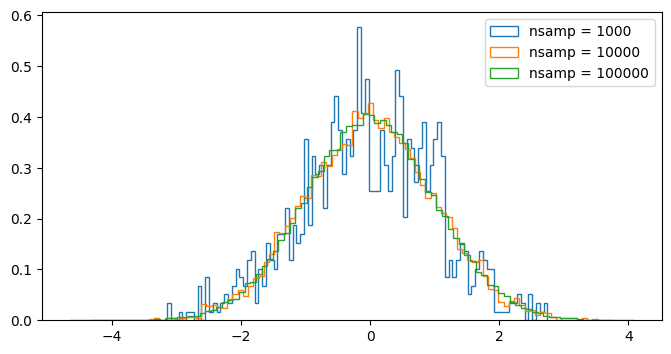

In [ ]:
# Draw samples from a Gaussian and plot them
mu = 0
sigma = 1
plt.figure()

#nsamp = 1000
for nsamp in [1e3,1e4,1e5]:
    samples = mu + sigma * np.random.randn(int(nsamp))
    plt.hist(samples, bins=100, histtype='step',lw=4,label='nsamp = {}'.format(int(nsamp)), density=True)
plt.legend();

In order to access data stored on the collective Google Drive, you must mount your drive to the notebook before accessing files. This requires authentication to allow Google Colab to access your files on your Google account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once you have authenticated, you can access your own Drive in addition to any shared drives. We recommend adding a shortcut to the shared `PHYSICS100_S2025` folder we have shared with you to your own drive by selecting More actions -> Organize -> Add Shortcut -> My Drive.

In [ ]:
ls /content/drive/MyDrive/PHYSICS100_S2025/

data/  Lab0/  python_tutorial/


Let's open a file similar to what will be output after a night of observing, FITS files. FITS files are composed of HDUs, or Header/Data Units. In almost all cases for this course, there will only be one HDU per file. The HDU contains a header, which gives information about the image, and the data, which is the image itself (although this does not always have to be the case, e.g. the light curve example below). For more information on the FITS file format, see [this introduction](https://fits.gsfc.nasa.gov/fits_primer.html).

In this tutorial, we will be looking at an image of the Whirlpool galaxy.

In [ ]:
# Open the FITS file using the fits python module
filename = '/content/drive/MyDrive/PHYSICS100_S2025/python_tutorial/m51_2024_04_28-0001_B.fit'
whirlpool_hdu = fits.open(filename)
print(type(whirlpool_hdu))

# Grab the header and data
whirlpool_header = whirlpool_hdu[0].header
whirlpool_data = whirlpool_hdu[0].data

# print the header
whirlpool_header

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 2394 /fastest changing axis                           
NAXIS2  =                 1597 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2024-04-29T04:04:46.50' /YYYY-MM-DDThh:mm:ss observation, UT         
EXPTIME =   30.000000000000000 /Exposure time in seconds                        
EXPOSURE=   30.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -15.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -15.100000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   15.0399999999999

Note that the above object is an HDUList, and although it only has one element we still need to index by 0 to grab the header and data. More information on handling objects with this module can be found [here](https://docs.astropy.org/en/latest/io/fits/index.html). There's a lot of information contained in the header about both the image and the telescope, and later labs will go through what is most important for image processing.

If you know what variable you want from the header, you can index the header object with a string.

In [ ]:
filter = whirlpool_header['FILTER']
print(f'This image was taken with the {filter} filter')

This image was taken with the B filter


In the cell below: find and print the date of observation and exposure time for the image loaded above.

In [ ]:
# TODO: above instructions

In addition to the header, the image can also be plotted (again using `matplotlib`).

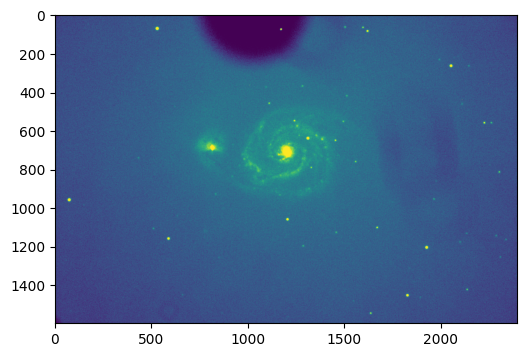

In [ ]:
plt.imshow(whirlpool_data, vmin=np.median(whirlpool_data)-2*np.std(whirlpool_data),vmax=np.median(whirlpool_data)+5*np.std(whirlpool_data))

The vmin and vmax parameters above define the data range that the image covers. Try plotting the image without defining vmin and vmax, and describe what changes. Do you have any guesses why this change would occur?

In [ ]:
# TODO: above instructions

FITS files don't only contain astronomical images! Let's take a look at a light curve.

In [ ]:
# plot curve from a data file
# kepler light curve
datadir = '/content/drive/MyDrive/PHYSICS100_S2025/'
datadir += 'python_tutorial/python_tutorial_FITS/'
infiles = glob.glob(datadir + '*.fits')
print(len(infiles))
print(infiles[0])

15
/content/drive/MyDrive/PHYSICS100_S2025/python_tutorial/python_tutorial_FITS/kplr011904151-2009131105131_llc.fits


We can use the `fits` functionality to open the data file, index the second extension (`[1]`) and access the various attributes of the data, then plot it (with labels!):

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


Text(0, 0.5, 'Flux (cts)')

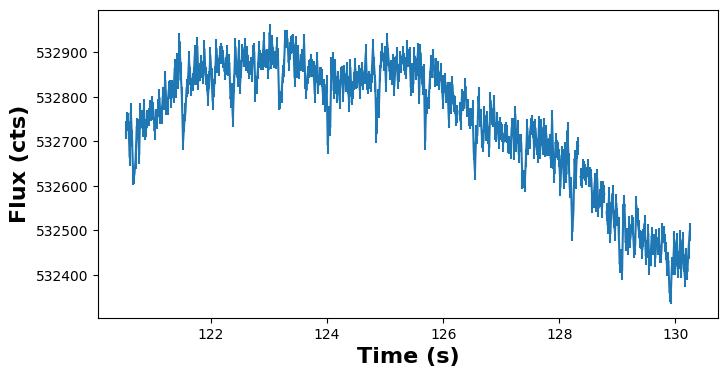

In [ ]:
kepler_hdulist = fits.open(infiles[0])
print(type(kepler_hdulist))
data = kepler_hdulist[1].data
x = data['TIME']
y = data['SAP_FLUX'] # Simple Aperture Flux
yerr = data['SAP_FLUX_ERR']

plt.errorbar(x,y,yerr=yerr)
plt.xlabel('Time (s)')
plt.ylabel('Flux (cts)')

Note that above the HDUList object does contain more than one element, and the data we are looking for is in the second index.

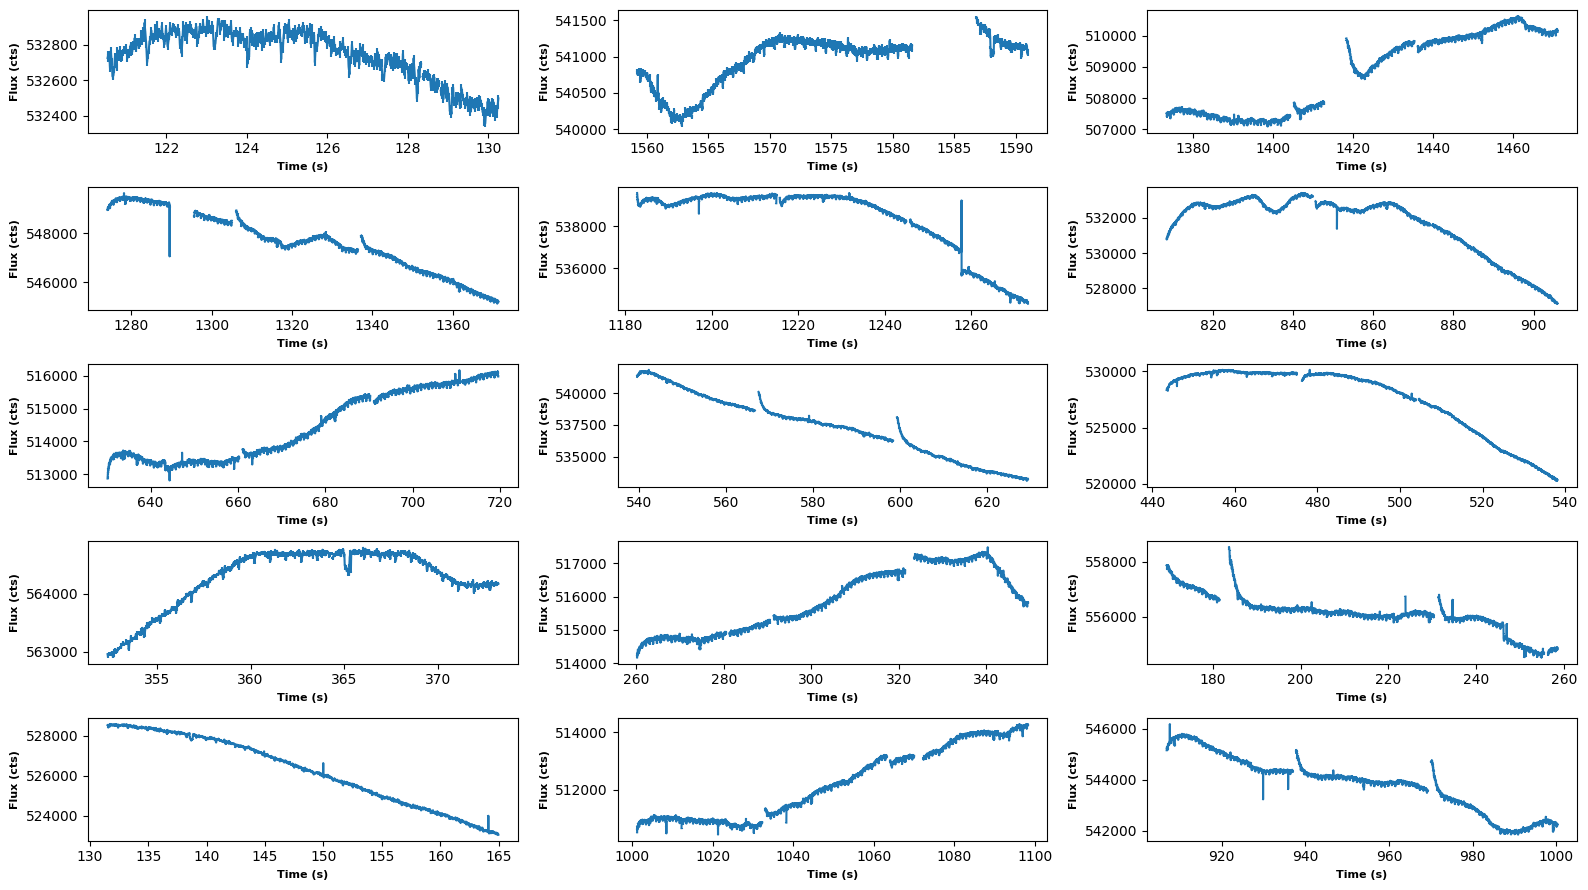

In [ ]:
fig, axarr = plt.subplots(5, 3, figsize=(16.,9.))
for i, infile in enumerate(infiles):
    data = fits.open(infile)[1].data
    x = data['TIME']
    y = data['SAP_FLUX'] # Simple Aperture Flux
    yerr = data['SAP_FLUX_ERR']

    axarr[i // 3, i % 3].errorbar(x,y,yerr=yerr)
    axarr[i // 3, i % 3].set_xlabel('Time (s)',size=8)
    axarr[i // 3, i % 3].set_ylabel('Flux (cts)',size=8)

plt.tight_layout()


If you have any more questions with FITS files, please let us know!